<a href="https://colab.research.google.com/github/Rizzshen/AiGoogleCollab/blob/main/worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded  = files.upload()

Saving diabetes_.csv to diabetes_.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes_.csv")

df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


#Changing the missing zero values to the median

In [ ]:
cols_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_to_replace:
    df[col] = df[col].replace(0, np.nan)   # convert zeros → missing
    df[col] = df[col].fillna(df[col].median())  # replace missing with median
(df == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


#Split 70/30 for training and testing


In [ ]:
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]
n_samples = X.shape[0]
train_size = int(0.7 * n_samples)
indices = np.arange(n_samples)
np.random.shuffle(indices)
train_idx = indices[:train_size]
test_idx = indices[train_size:]
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]

y_train = Y.iloc[train_idx]
y_test = Y.iloc[test_idx]


In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

#Building KNN


In [24]:
def euclidean_distance(point1, point2):
# Check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [25]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [37]:
X_train_np = X_train_scaled.values
X_test_np = X_test_scaled.values
y_train_np = y_train.values
y_test_np = y_test.values
y_pred = knn_predict(X_test_np, X_train_np, y_train_np, k=3)


In [38]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)
acc = accuracy(y_test_np, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7272727272727273


#Problem 3: Experiment with k


In [43]:
import time
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = range(1, 16)

acc_original = []
acc_scaled = []

time_original = []
time_scaled = []

In [44]:
for k in k_values:

    # -------- ORIGINAL DATA --------
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train
    knn.fit(X_train, y_train)

    # Predict with time measurement
    start = time.time()
    y_pred = knn.predict(X_test)
    end = time.time()

    # Accuracy
    acc_original.append(np.mean(y_pred == y_test))

    # Time taken
    time_original.append(end - start)

    # -------- SCALED DATA --------
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)

    start = time.time()
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    end = time.time()

    acc_scaled.append(np.mean(y_pred_scaled == y_test))
    time_scaled.append(end - start)


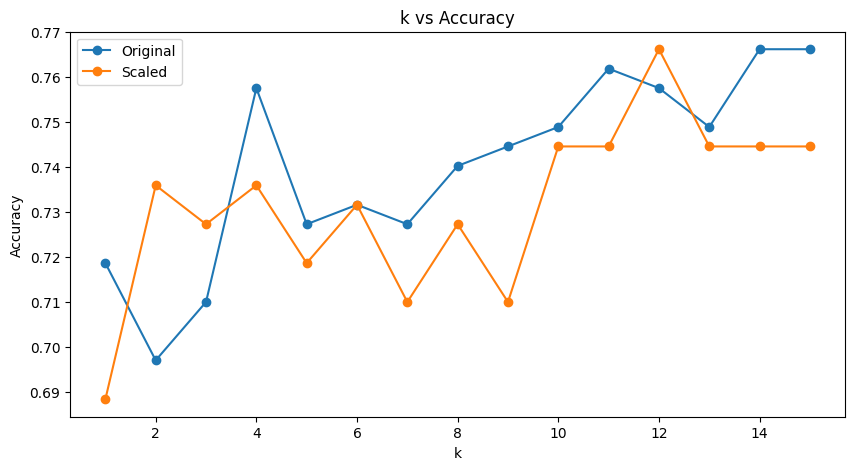

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.show()

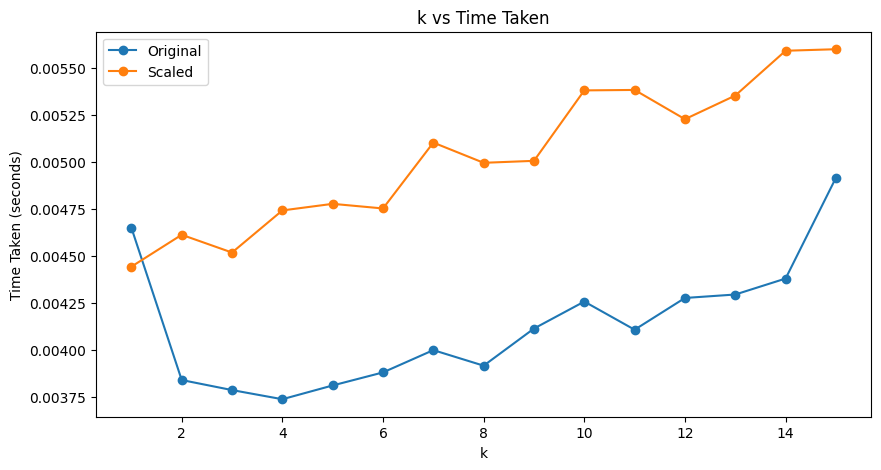

In [46]:
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.show()